In [ ]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

     

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Handling Categorical values
### Changing the data type of each float cloumn to int

df['Gender']=df['Gender'].map({'Female':1,'Male':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1, 'Rural':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [ ]:

# Handling Categorical values
### Changing the data type of each float cloumn to int
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

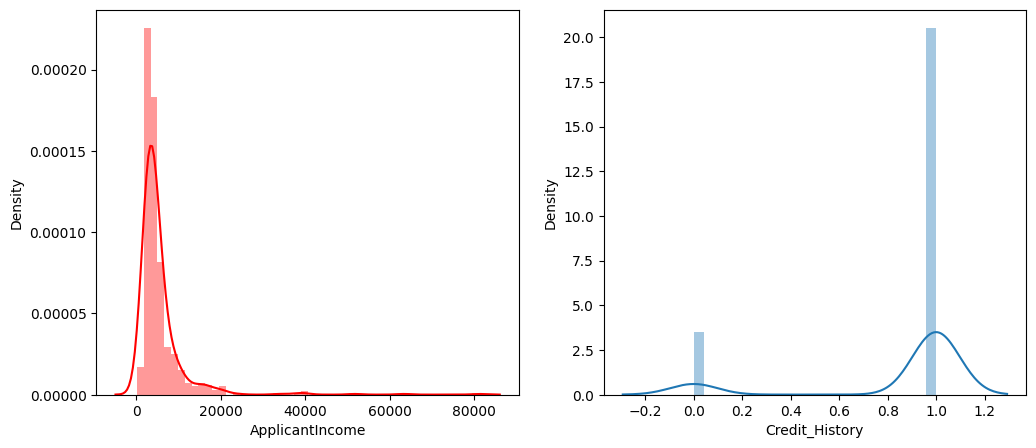

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

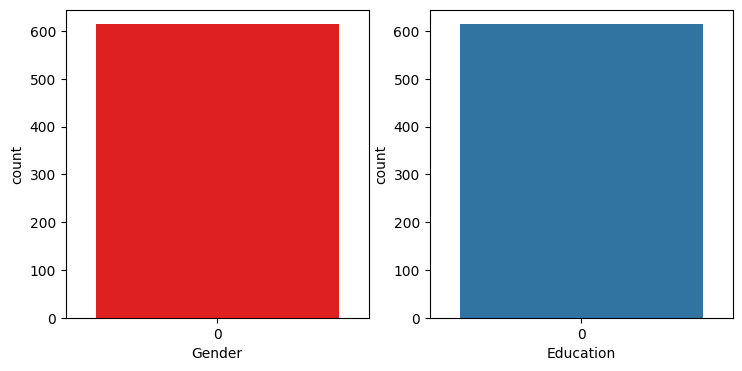

In [ ]:

#gender andeducation Visual 
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(df ['Gender'],color='r')
plt.xlabel('Gender')
plt.subplot(1,4,2)
sns.countplot(df['Education'])
plt.xlabel('Education')
plt.show()

<Axes: ylabel='count'>

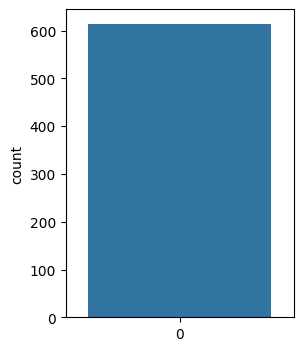

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.countplot(df['Married'])


<Axes: >

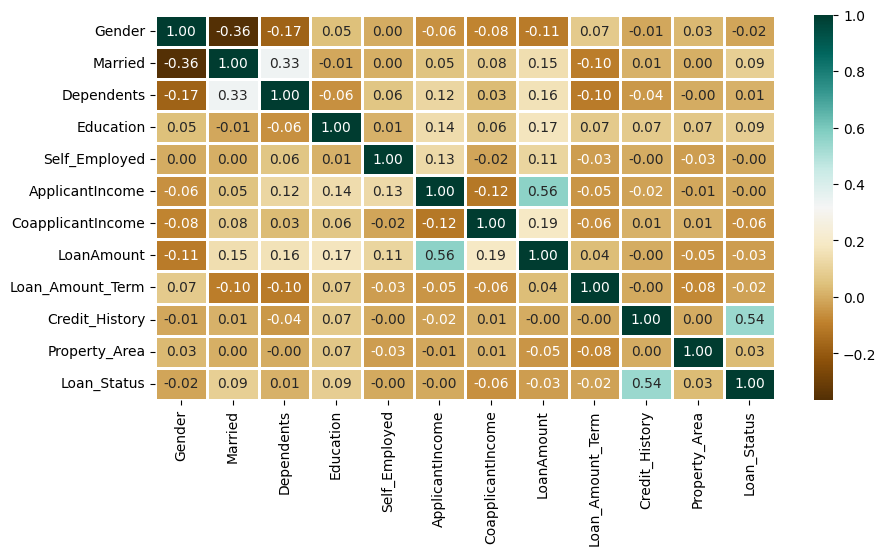

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)

<Axes: xlabel='Property_Area', ylabel='count'>

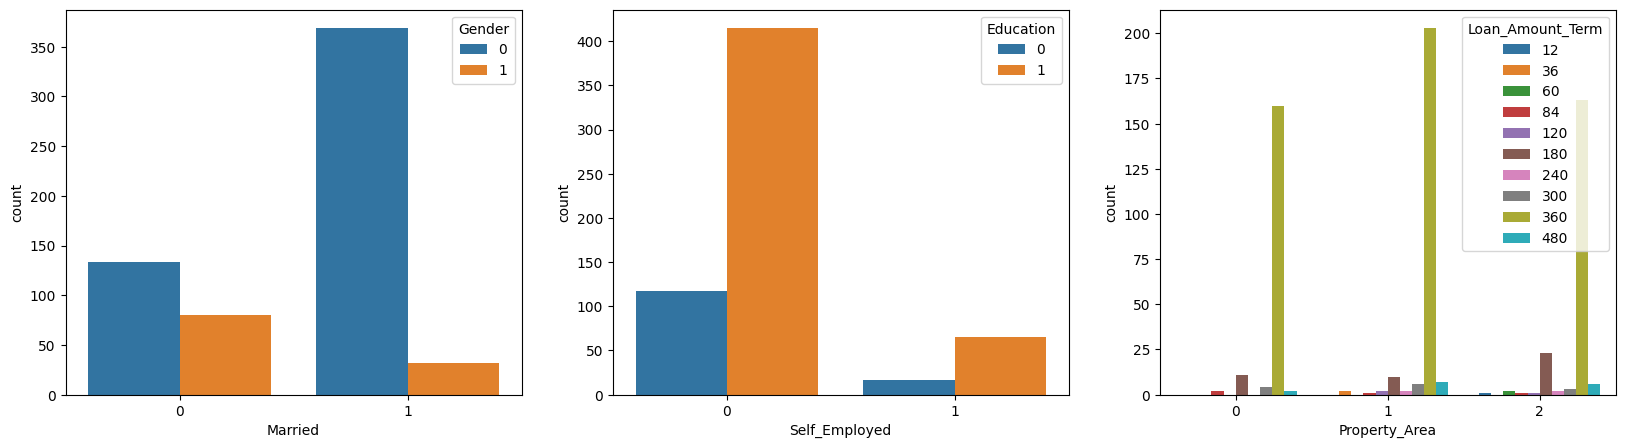

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x = 'Married', hue = "Gender", data = df)
plt.subplot(1,3,2)
sns.countplot(x = 'Self_Employed', hue = "Education", data = df)
plt.subplot(1,3,3)
sns.countplot(x = 'Property_Area', hue = "Loan_Amount_Term", data = df)

In [ ]:
pd.crosstab(df['Gender'],[df['Self_Employed']])


Self_Employed,0,1
Gender,,
0,435,67
1,97,15


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

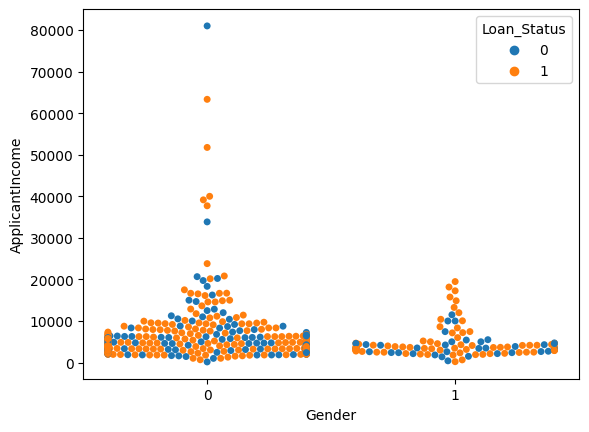

In [ ]:

#visualized based gender and income what would be the application status
sns.swarmplot(x = 'Gender', y = 'ApplicantIncome', hue = "Loan_Status", data = df)


In [ ]:


# Handling Imbalance Data
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [ ]:

x.shape


(614, 11)

In [ ]:

y.shape

(614,)

In [ ]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())


1    422
0    192
Name: Loan_Status, dtype: int64
1    354
0    354
Name: Loan_Status, dtype: int64


In [ ]:
names = x_bal.columns

In [ ]:
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0,120,360,1,2
1,0,1,1,1,0,4583,1508,128,360,1,0
2,0,1,0,1,1,3000,0,66,360,1,2
3,0,1,0,0,0,2583,2358,120,360,1,2
4,0,0,0,1,0,6000,0,141,360,1,2


In [ ]:
#performing feature scaling operation using standard scaller an x part ofthe dataset because
#there different type of value in the columns
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=names)
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.421944,-1.123379,-0.704870,0.614355,-0.333856,0.121091,-0.449921,-0.280691,0.307166,0.605636,1.376236
1,-0.421944,0.890171,0.361472,0.614355,-0.333856,-0.113501,-0.048636,-0.170001,0.307166,0.605636,-1.194675
2,-0.421944,0.890171,-0.704870,0.614355,2.995301,-0.406833,-0.449921,-1.027845,0.307166,0.605636,1.376236
3,-0.421944,0.890171,-0.704870,-1.627724,-0.333856,-0.484104,0.177552,-0.280691,0.307166,0.605636,1.376236
4,-0.421944,-1.123379,-0.704870,0.614355,-0.333856,0.149072,-0.449921,0.009869,0.307166,0.605636,1.376236


In [ ]:
#splitting the dataset in train and test on balnmced data set
x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal, test_size=0.33, random_state=42)
x_train.shape


(474, 11)

In [ ]:
x_train.shape

(474, 11)

In [ ]:

y_train.shape, y_test.shape

((474,), (234,))

In [ ]:
#RandomForest model
from tensorflow.keras import Model
def RandomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))

In [ ]:

RandomForest(x_train,x_test,y_train,y_test)

1.0
0.8290598290598291


In [ ]:
#decisionTree model
def decisionTree(x_train,x_test,y_train,y_test):
 model = DecisionTreeClassifier()
 model.fit(x_train,y_train)
 y_tr = model.predict(x_train)
 print(accuracy_score(y_tr,y_train))
 yPred = model.predict(x_test)
 print(accuracy_score(yPred,y_test))


In [ ]:

decisionTree(x_train,x_test,y_train,y_test)

1.0
0.7735042735042735


In [ ]:
#KNN model
def KNN(x_train,x_test,y_train,y_test):
  model = KNeighborsClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))


In [ ]:
KNN(x_train,x_test,y_train,y_test)

0.8375527426160337
0.7435897435897436


In [ ]:
#XGB model
def XGB(x_train,x_test,y_train,y_test):
  model = GradientBoostingClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(yPred,y_test))


In [ ]:

XGB(x_train,x_test,y_train,y_test)

0.9240506329113924
0.8205128205128205


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))
classifier.add(Dense(units=50, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 86ms/step - loss: 0.6777 - accuracy: 0.5778 - val_loss: 0.6719 - val_accuracy: 0.5789
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6364 - accuracy: 0.7018 - val_loss: 0.6334 - val_accuracy: 0.6947
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6012 - accuracy: 0.7757 - val_loss: 0.6029 - val_accuracy: 0.7368
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5707 - accuracy: 0.7889 - val_loss: 0.5760 - val_accuracy: 0.7368
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5438 - accuracy: 0.8047 - val_loss: 0.5496 - val_accuracy: 0.7789
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5185 - accuracy: 0.8021 - val_loss: 0.5275 - val_accuracy: 0.8000
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.4972 - accuracy: 0.8021 - val_loss: 0.5067 - val_accuracy: 0.8000
Epoch 8/100
4/4 [===

In [ ]:
y_pred = classifier.predict(x_test)

8/8 [==============================] - 0s 4ms/step


In [ ]:

y_pred

array([[9.01962340e-01],
       [9.15753782e-01],
       [8.81384730e-01],
       [8.88931036e-01],
       [1.93579050e-04],
       [9.14487362e-01],
       [8.93640518e-01],
       [8.85217249e-01],
       [1.56687608e-03],
       [7.56815672e-01],
       [1.71202933e-03],
       [7.73346245e-01],
       [5.99376440e-01],
       [9.45215225e-01],
       [1.28541460e-05],
       [9.12889719e-01],
       [9.87916112e-01],
       [4.94978216e-04],
       [8.30464244e-01],
       [9.47577178e-01],
       [6.58377469e-01],
       [8.88274670e-01],
       [9.35877800e-01],
       [3.25810222e-04],
       [1.04989245e-04],
       [9.61987495e-01],
       [9.75043774e-01],
       [7.62053430e-01],
       [9.86301661e-01],
       [9.18268144e-01],
       [2.29094985e-05],
       [8.88296843e-01],
       [9.14759576e-01],
       [3.16016078e-01],
       [8.72870147e-01],
       [1.57376763e-03],
       [8.79902840e-01],
       [7.85496593e-01],
       [6.76390767e-01],
       [7.96486437e-01],


In [ ]:

y_pred = y_pred.astype(int)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:

print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       112
           1       0.75      0.80      0.78       122

    accuracy                           0.76       234
   macro avg       0.76      0.76      0.76       234
weighted avg       0.76      0.76      0.76       234



In [ ]:

confusion_matrix(y_test,dt.predict(x_test))

array([[80, 32],
       [24, 98]])

In [ ]:
#checking the accuracy
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))
print("classification_report")
print(classification_report(y_test, y_pred))


0.47863247863247865
ANN Model
confusion_matrix
[[112   0]
 [122   0]]
classification_report
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       112
           1       0.00      0.00      0.00       122

    accuracy                           0.48       234
   macro avg       0.24      0.50      0.32       234
weighted avg       0.23      0.48      0.31       234



In [ ]:
dt.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])


array([0])

In [ ]:

rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       112
           1       0.75      0.80      0.78       122

    accuracy                           0.76       234
   macro avg       0.76      0.76      0.76       234
weighted avg       0.76      0.76      0.76       234



In [ ]:
rfr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       112
           1       0.75      0.80      0.78       122

    accuracy                           0.76       234
   macro avg       0.76      0.76      0.76       234
weighted avg       0.76      0.76      0.76       234



In [ ]:
knn.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

array([1])

In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
print(classification_report(y_test,dt.predict(x_test)))


              precision    recall  f1-score   support

           0       0.77      0.71      0.74       112
           1       0.75      0.80      0.78       122

    accuracy                           0.76       234
   macro avg       0.76      0.76      0.76       234
weighted avg       0.76      0.76      0.76       234



In [ ]:
xgb.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([1])

In [ ]:
classifier.save("loan.h5")
y_pred = classifier.predict(x_test)

8/8 [==============================] - 0s 3ms/step


In [ ]:
y_pred


array([[9.01962340e-01],
       [9.15753782e-01],
       [8.81384730e-01],
       [8.88931036e-01],
       [1.93579050e-04],
       [9.14487362e-01],
       [8.93640518e-01],
       [8.85217249e-01],
       [1.56687608e-03],
       [7.56815672e-01],
       [1.71202933e-03],
       [7.73346245e-01],
       [5.99376440e-01],
       [9.45215225e-01],
       [1.28541460e-05],
       [9.12889719e-01],
       [9.87916112e-01],
       [4.94978216e-04],
       [8.30464244e-01],
       [9.47577178e-01],
       [6.58377469e-01],
       [8.88274670e-01],
       [9.35877800e-01],
       [3.25810222e-04],
       [1.04989245e-04],
       [9.61987495e-01],
       [9.75043774e-01],
       [7.62053430e-01],
       [9.86301661e-01],
       [9.18268144e-01],
       [2.29094985e-05],
       [8.88296843e-01],
       [9.14759576e-01],
       [3.16016078e-01],
       [8.72870147e-01],
       [1.57376763e-03],
       [8.79902840e-01],
       [7.85496593e-01],
       [6.76390767e-01],
       [7.96486437e-01],


In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [ ]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1, -1)
  sample_valu = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
sample_value = [[1,1,0,1,1,4276,1542,145,240,0,1]]

In [ ]:
if predict_exit(sample_value)>0.5:
  print('Prediction: High Chance of Loan Approval!')
else:
  print('Prediction: Low Chance of Loan Approval!')


1/1 [==============================] - 0s 200ms/step
Prediction: High Chance of Loan Approval!


In [ ]:
sample_value = [[1,0, 1, 1, 1, 45, 14,45, 240, 1,1]]


In [ ]:
if predict_exit(sample_value)>0.5:
  print('Prediction: High Chance of Loan Approval!')
else:
  print('Prediction: Low Chance of Loan Approval!')

1/1 [==============================] - 0s 66ms/step
Prediction: Low Chance of Loan Approval!


In [ ]:
#saving the  model
pickle.dump(rfr,open('model.pkl','wb'))

In [ ]:
pickle.dump(sc,open('scale.pkl','wb'))